In [1]:
import numpy as np

from tools.surface_code import generate_steane_circuit
from tools.error_models import add_noise, construct_basic_noise_model
from tools.analysis import count_logical_errors_using_MWPM, count_logical_errors_using_ML, plot_diff_noise_level
from tools.helper import save_circuit_diagram


In [5]:
distance = 9
# First test the noiselesss generation of steane circuits 
circuit = generate_steane_circuit(distance=9)

save_circuit_diagram(circuit,"testing.svg")

print(count_logical_errors_using_MWPM(circuit,10))

0


In [2]:
distance = 3 
noise_level = 0.01
num_shots = 100
circuit  = generate_steane_circuit(distance)
noisy_circ = add_noise(circuit, construct_basic_noise_model(noise_level))

save_circuit_diagram(noisy_circ,"noisy_test.svg")

print(count_logical_errors_using_MWPM(noisy_circ, num_shots, shortest_error=True))

The shortest possible error (found by stim) is formed by:
error(1) D6 D7 L0
error(1) D6 L0
error(1) D7 L0
And it hast the lenght: 3
0


In [33]:
# Goal is finding out how to split this one properly

distance = 3 
noise_level = 0.9
num_shots = 5
X_errors = True 
Z_errors = True 

d = distance

circuit  = generate_steane_circuit(distance)
noisy_circ = add_noise(circuit, construct_basic_noise_model(noise_level,X_errors=X_errors, Z_errors=Z_errors))

sampler = noisy_circ.compile_detector_sampler()
detection_events, observable_flips = sampler.sample(num_shots, separate_observables=True)

print(observable_flips)

print(detection_events)
# first 6: X stab
# second 6: Z stab

# test: x errors turned off, only Z errors!!!
# therefore only first 6 index!
"""
decoder to ancilla (qubits): for d=3 more general (d*(d-1)) X-stab followed by (d*(d-1)) Z-stab
               X-stab               Z-stab
decoder [ 0, 1, 2, 3, 4, 5,     6, 7, 8, 9,10,11]
ancilla [13,14,15,16,17,18,    19,20,21,22,23,24]

Note, that this is the representation for only surface code!
Therefore the mapping on aux qubits |0> and |+> and their different index are not taken into account!
"""


[[False]
 [ True]
 [ True]
 [False]
 [False]]
[[False  True  True  True False  True  True False False  True  True False]
 [ True False  True  True  True  True  True  True False False  True  True]
 [False False  True  True False  True  True False False  True  True  True]
 [ True False  True  True False  True  True  True False False False  True]
 [ True False  True  True False  True  True  True  True  True False  True]]


'\ndecoder to ancilla (qubits): for d=3 more general (d*(d-1)) X-stab followed by (d*(d-1)) Z-stab\n               X-stab               Z-stab\ndecoder [ 0, 1, 2, 3, 4, 5,     6, 7, 8, 9,10,11]\nancilla [13,14,15,16,17,18,    19,20,21,22,23,24]\n\nNote, that this is the representation for only surface code!\nTherefore the mapping on aux qubits |0> and |+> and their different index are not taken into account!\n'

/home/leo/Documents/MasterArbeit/code/new_start/tools/analysis.py:104: RuntimeWarning: divide by zero encountered in log
  y, x= clean_array(np.log(log_prob), np.log(noise))


<Figure size 640x480 with 0 Axes>

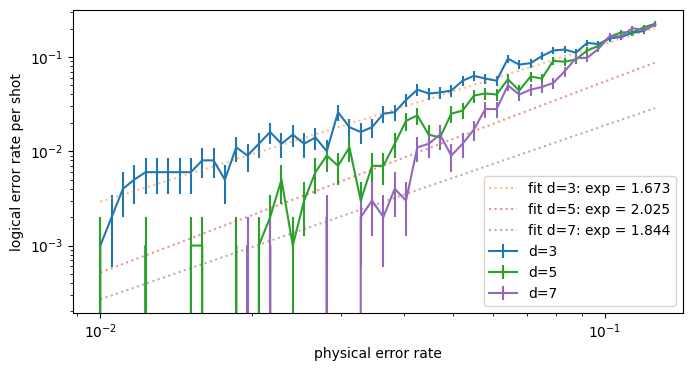

In [ ]:
distances = [3,5,7]
noise_set = np.logspace(-2,-0.9)
num_shots = 10_000

steane_circuits = [generate_steane_circuit(d) for d in distances]

plot_diff_noise_level(
    steane_circuits,
    construct_basic_noise_model,
    count_log_error_fct=count_logical_errors_using_MWPM,
    filename="basic_test_MWPM",
    distances= distances ,
    noise_set= noise_set,
    num_shots=num_shots,
    fit_slopes = True,
    reference_lines = False,
)


In [ ]:
# Goal is finding out how to split this one properly

distance = 3 
noise_level = 0.01
num_shots = 100 
X_errors = True 
Z_errors = False 

d = distance

circuit  = generate_steane_circuit(distance)
noisy_circ = add_noise(circuit, construct_basic_noise_model(noise_level,X_errors=X_errors, Z_errors=Z_errors))

count_logical_errors_using_ML(
    circuit=noisy_circ,
    num_shots=num_shots,
    distance=distance,
    error_rate=noise_level,
    )


4

/home/leo/Documents/MasterArbeit/code/new_start/tools/analysis.py:104: RuntimeWarning: divide by zero encountered in log
  y, x= clean_array(np.log(log_prob), np.log(noise))
/home/leo/Documents/MasterArbeit/code/new_start/tools/ml_decoder.py:110: RuntimeWarning: invalid value encountered in sqrt
  gamma  *= np.sqrt(np.linalg.det(m + a))
/home/leo/Documents/MasterArbeit/code/new_start/tools/ml_decoder.py:161: RuntimeWarning: invalid value encountered in scalar power
  coset_prob = pauli_error_prob * np.sqrt(gamma / 2) * (np.linalg.det((m + gen_m_0(self.d))))**(1/4)


unexpected
unexpected
unexpected
unexpected
unexpected
unexpected


<Figure size 640x480 with 0 Axes>

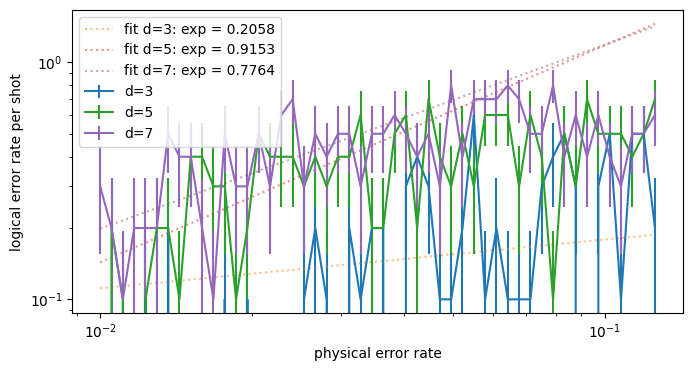

In [ ]:
distances = [3,5,7]
noise_set = np.logspace(-2,-0.9, num=10)
num_shots = 1000

steane_circuits = [generate_steane_circuit(d) for d in distances]

plot_diff_noise_level(
    steane_circuits,
    construct_basic_noise_model,
    filename="basic_test_ML",
    count_log_error_fct=count_logical_errors_using_ML,
    distances= distances ,
    noise_set= noise_set,
    num_shots=num_shots,
    fit_slopes = True,
    reference_lines = False,
)

